In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('data.csv')


# Check nan values
if df.columns[df.isna().sum()].empty == False:
    print('There are missing data points.')
    df = df.transpose().dropna(axis=1).transpose()
    print('Rows with NAN values are removed.')
else:
    print('There is NO missing data points.')


#Dropping Unnecessary Columns
df_refined = df.drop('diagnosis', axis=1)   #This column is target.
df_refined = df_refined.drop('id', axis=1)   #This column is target.
col_names = df_refined.columns

#Scaling
scaler = StandardScaler()
df_refined = scaler.fit_transform(df_refined)


#Encoding
target = df['diagnosis'].apply(lambda x: 1 if x=='M' else 0) #The target column is label encoded separatedly.


#Normalization
from sklearn.preprocessing import Normalizer
norm = Normalizer()
df_refined = norm.fit_transform(df_refined)


#save to data_refined.csv
df_refined = pd.DataFrame(df_refined, columns=col_names)
df_refined.to_csv('df_refined.csv')

There are missing data points.
Rows with NAN values are removed.


In [18]:
target.reset_index(drop=True, inplace= True)
target

0      1
1      1
2      1
3      1
4      1
      ..
561    1
562    1
563    1
564    1
565    0
Name: diagnosis, Length: 566, dtype: int64

In [19]:
df_refined = pd.read_csv('df_refined.csv', index_col=0)
df_refined['label'] = target
df_refined

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,label
0,-0.054405,0.017853,-0.041799,-0.054094,0.234341,0.244889,0.137710,0.104796,0.205176,0.350901,...,0.009316,-0.017252,-0.038741,0.241800,0.279060,0.142368,0.156688,0.433463,0.352140,1
1,0.298471,-0.195691,0.302899,0.311343,0.047969,0.093131,0.234316,0.244862,-0.000675,-0.095090,...,-0.248392,0.229276,0.209324,0.037712,-0.052272,0.104761,0.125759,-0.146556,-0.066494,1
2,-0.081586,-0.145786,-0.066032,-0.086702,0.389171,0.218908,0.152368,0.145708,0.175891,0.329183,...,-0.054954,-0.018476,-0.041007,0.355689,0.301177,0.220528,0.159889,0.307162,0.390104,1
3,0.295252,0.039278,0.287013,0.276289,-0.030014,0.023925,0.077047,0.164854,-0.014696,-0.190308,...,0.079731,0.345749,0.322516,0.129970,0.006767,0.128652,0.302959,0.067471,-0.002611,1
4,-0.026309,0.084289,-0.015437,-0.050235,0.381393,0.274170,0.016228,0.069485,0.334910,0.395153,...,0.094275,0.025903,0.009138,0.343677,0.174030,-0.003819,0.151222,0.115398,0.410691,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,0.252605,0.085407,0.246592,0.280351,0.124218,0.027048,0.233363,0.278715,-0.036558,-0.110675,...,0.013601,0.210476,0.241949,0.045214,-0.031927,0.079679,0.195904,-0.161649,-0.083784,1
562,0.269213,0.326476,0.255210,0.272181,0.016527,-0.001742,0.110219,0.200724,-0.033297,-0.165954,...,0.319868,0.225425,0.237019,-0.107766,-0.061210,0.037903,0.117161,-0.082718,-0.151981,1
563,0.183712,0.527062,0.176039,0.151527,-0.216045,-0.008283,0.013898,0.029801,-0.207609,-0.230979,...,0.353221,0.152466,0.113395,-0.207827,0.092309,0.085667,0.109860,-0.284510,-0.081023,1
564,0.166085,0.209409,0.179036,0.156799,0.137147,0.296299,0.297701,0.240814,0.192538,0.093953,...,0.200130,0.208500,0.149918,0.128343,0.352140,0.287613,0.207445,0.173506,0.199486,1


In [26]:
print('The most correlated feature is: ', df_refined.corr().sort_values(by='label', ascending=False).index[1])

The most correlated feature is:  perimeter_worst


<Axes: >

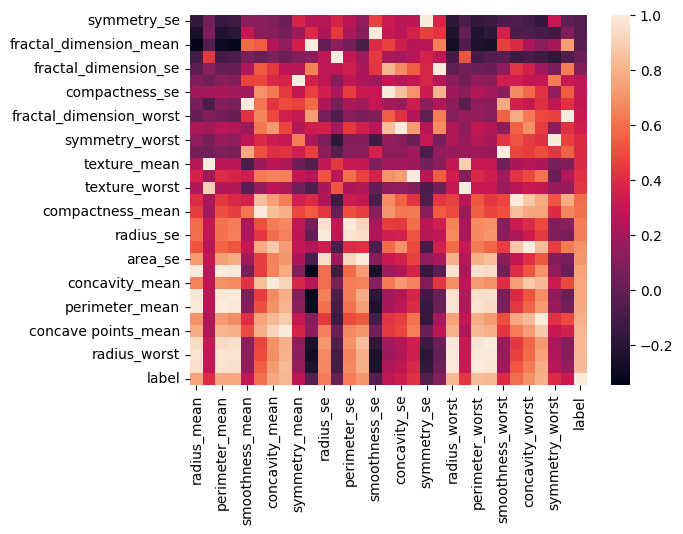

In [21]:
sns.heatmap(df_refined.corr().sort_values(by='label'))

In [29]:
X = df_refined.drop('label', axis=1)
y = df_refined.label

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=0)


param_grid = {"n_neighbors": [i for i in range(2,11)]}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, verbose=2, refit = True)
grid.fit(X_val, y_val)



Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ......................................n_neighbors=2; total time=   2.2s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=4; total time=   0.0s
[CV] END ......................................n_

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
             verbose=2)

In [36]:
KNeighborsClassifier(**grid.best_params_)

KNeighborsClassifier(n_neighbors=4)

In [37]:
#Load libraries

from sklearn.model_selection import cross_val_score, StratifiedKFold

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier



accuracies = []
models = [
    KNeighborsClassifier(**grid.best_params_),
    SVC(C=100, kernel='rbf', gamma=0.001),
    RandomForestClassifier(random_state=0)
]

skfold = StratifiedKFold(shuffle=True, random_state=0)


for clf in models:
    score=cross_val_score(clf, X_train, y_train, cv=skfold)
    accuracies.append(round(score.mean(), 3))

In [38]:
accuracies = np.array(accuracies).reshape(1,len(models))
results = pd.DataFrame(accuracies,columns=[clf.__class__.__name__ for clf in models])
results


,KNeighborsClassifier,SVC,RandomForestClassifier
0,0.956,0.976,0.958


In [67]:
def train_classifiers(X,y):
    

    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.model_selection import (cross_val_score, 
                                         StratifiedKFold, 
                                         GridSearchCV,
                                         train_test_split)
    from sklearn.svm import SVC
    from sklearn.ensemble import RandomForestClassifier


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=0)


    param_grid = {"n_neighbors": [i for i in range(2,11)]}
    grid = GridSearchCV(KNeighborsClassifier(), param_grid, verbose=0, refit = True)
    grid.fit(X_val, y_val)


    accuracies = []
    models = [
        KNeighborsClassifier(**grid.best_params_),
        SVC(C=100, kernel='rbf', gamma=0.001),
        RandomForestClassifier(random_state=0)
    ]

    skfold = StratifiedKFold(shuffle=True, random_state=0)


    for clf in models:
        score=cross_val_score(clf, X_train, y_train, cv=skfold)
        accuracies.append(round(score.mean(), 3))


    n_components = [X.shape[1]]
    accuracies = accuracies + n_components
    accuracies = np.array(accuracies).reshape(1, len(models) + 1)
    return pd.DataFrame(accuracies,columns=[clf.__class__.__name__ for clf in models]+['n_components'])


    

In [ ]:
from sklearn.decomposition import PCA

df_comp = pd.DataFrame({key:[] for key in ['KNeighborsClassifier', "SVC", "RandomForestClassifier", 'n_components']})
for i in range(3,20):
    pca = PCA(n_components=i)

    X_reduced = pca.fit_transform(X)


    df_comp = pd.concat([df_comp, train_classifiers(X_reduced,y)], ignore_index=True)
    

In [69]:
df_comp.sort_values(by='SVC', ascending=False)

,KNeighborsClassifier,SVC,RandomForestClassifier,n_components
11,0.956,0.978,0.949,14.0
13,0.951,0.976,0.949,16.0
8,0.951,0.976,0.954,11.0
6,0.956,0.976,0.951,9.0
7,0.949,0.976,0.956,10.0
12,0.954,0.976,0.947,15.0
10,0.956,0.976,0.947,13.0
9,0.956,0.976,0.947,12.0
5,0.958,0.976,0.954,8.0
15,0.954,0.976,0.942,18.0


In [ ]:
from sklearn.feature_selection import RFECV

rfecv = RFECV(RandomForestClassifier(), cv=5)
rfecv.fit_transform(X,y)


array([[-0.054405  ,  0.0178532 , -0.04179862, ..., -0.03874104,
         0.14236812,  0.15668801],
       [ 0.29847107, -0.19569095,  0.30289897, ...,  0.20932372,
         0.10476059,  0.12575885],
       [-0.08158644, -0.14578552, -0.06603232, ..., -0.04100652,
         0.22052846,  0.15988915],
       ...,
       [ 0.18371241,  0.52706204,  0.17603934, ...,  0.11339545,
         0.08566694,  0.10985994],
       [ 0.16608521,  0.20940893,  0.1790357 , ...,  0.14991795,
         0.28761262,  0.20744462],
       [-0.26122205,  0.17637886, -0.26205443, ..., -0.15508504,
        -0.18842527, -0.25254897]], shape=(566, 13))

In [72]:
rfecv.get_feature_names_out()

array(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'concavity_mean', 'concave points_mean', 'area_se', 'radius_worst',
       'texture_worst', 'perimeter_worst', 'area_worst',
       'concavity_worst', 'concave points_worst'], dtype=object)

In [74]:
rfecv.estimator_.feature_importances_

array([0.0157412 , 0.02556735, 0.02687055, 0.04295763, 0.09117848,
       0.11777773, 0.031355  , 0.16861904, 0.03497819, 0.16325797,
       0.14399076, 0.03147062, 0.10623549])

In [75]:
train_classifiers(X[rfecv.get_feature_names_out()],y)

,KNeighborsClassifier,SVC,RandomForestClassifier,n_components
0,0.949,0.969,0.962,13.0
